In [96]:
import pandas as pd
import pickle
import seaborn

with open("tatform.pkl", "rb") as f:
    tatform_results = pickle.load(f)
with open("leeform.pkl", "rb") as f:
    leeform_results = pickle.load(f)

tatform = pd.DataFrame.from_dict(tatform_results)
leeform = pd.DataFrame.from_dict(leeform_results)

In [97]:
tatform

,youkoso_chikyuu_san,kimagure_robotto,torikaeko,silent_cry,doujidai_geemu,bokko_chan
score,-169.957816,-152.601473,-215.001196,-191.538747,-226.061737,-159.995102
factors,"{'CONSTANT': 1.0, 'TOOTEN_TO_KUTEN_RATIO': 1.7...","{'CONSTANT': 1.0, 'TOOTEN_TO_KUTEN_RATIO': 1.3...","{'CONSTANT': 1.0, 'TOOTEN_TO_KUTEN_RATIO': 2.2...","{'CONSTANT': 1.0, 'TOOTEN_TO_KUTEN_RATIO': 1.4...","{'CONSTANT': 1.0, 'TOOTEN_TO_KUTEN_RATIO': 2.6...","{'CONSTANT': 1.0, 'TOOTEN_TO_KUTEN_RATIO': 1.4..."
weighted factors,"{'CONSTANT': -109.1, 'TOOTEN_TO_KUTEN_RATIO': ...","{'CONSTANT': -109.1, 'TOOTEN_TO_KUTEN_RATIO': ...","{'CONSTANT': -109.1, 'TOOTEN_TO_KUTEN_RATIO': ...","{'CONSTANT': -109.1, 'TOOTEN_TO_KUTEN_RATIO': ...","{'CONSTANT': -109.1, 'TOOTEN_TO_KUTEN_RATIO': ...","{'CONSTANT': -109.1, 'TOOTEN_TO_KUTEN_RATIO': ..."


In [98]:
titles = ["bokko_chan", "youkoso_chikyuu_san", "kimagure_robotto", "silent_cry", "doujidai_geemu", "torikaeko"]
tatform_factors = {title: tatform_results[title]['factors'] for title in titles}
tatform_weighted_factors = {title: tatform_results[title]['weighted factors'] for title in titles}
leeform_factors = {title: leeform_results[title]['factors'] for title in titles}
leeform_weighted_factors = {title: leeform_results[title]['weighted factors'] for title in titles}
scores = {
    'tatform': {title: tatform[title]['score'] for title in titles},
    'leeform': {title: leeform[title]['score'] for title in titles}
         }
scores['tatform with positive constant weight'] = {
    title: scores['tatform'][title]+2*109.1 for title in scores['tatform']
}

In [99]:
FACTORS_TYPES = 'factors', 'weighted factors'
METRICS = 'tatform', 'leeform'

data_for_plots = {}
dfs_for_plots = {}
results = {'tatform': tatform_results, 'leeform': leeform_results}
for metric in METRICS:
    data_for_plots[metric] = {}
    dfs_for_plots[metric] = {}
    for factors_type in FACTORS_TYPES:
        data_for_plots[metric][factors_type] = []
        for title in titles:
            row = results[metric][title][factors_type]
            if metric == 'tatform':
                row['tatform with positive constant weight'] = scores['tatform with positive constant weight'][title]
            row[metric] = scores[metric][title]
            row['title'] = title
            data_for_plots[metric][factors_type].append(row)
        dfs_for_plots[metric][factors_type] = pd.DataFrame(data_for_plots[metric][factors_type])

    
# test_df = [tatform_results[title]['factors'] for title in titles]
# pd.DataFrame(test_df)


In [100]:
dfs_for_plots['tatform']['weighted factors']

,CONSTANT,TOOTEN_TO_KUTEN_RATIO,KANJI_RUNS_PERCENTAGE,KATAKANA_RUNS_PERCENTAGE,HIRAGANA_RUNS_PERCENTAGE,ALPHABET_RUNS_PERCENTAGE,LETTERS_PER_KANJI_RUN,LETTERS_PER_KATAKANA_RUN,LETTERS_PER_HIRAGANA_RUN,LETTERS_PER_ALPHABET_RUN,LETTERS_PER_SENTENCE,tatform with positive constant weight,tatform,title
0,-109.1,-5.632241,-7.529220,-1.851315,14.305528,0.006928,-32.654409,-16.671547,28.320000,-1.526087,-27.662740,58.204898,-159.995102,bokko_chan
1,-109.1,-6.597807,-7.616402,-1.650656,14.297770,0.000996,-33.928971,-19.386367,27.403312,-3.150000,-30.229691,48.242184,-169.957816,youkoso_chikyuu_san
2,-109.1,-5.200180,-6.926661,-3.140776,14.598769,0.000000,-30.797640,-15.680244,29.563303,-0.000000,-25.918044,65.598527,-152.601473,kimagure_robotto
3,-109.1,-5.788979,-8.255992,-2.024537,13.271665,0.008510,-35.696879,-20.220406,26.247294,-4.758750,-45.220673,26.661253,-191.538747,silent_cry
4,-109.1,-10.355163,-8.679014,-1.409553,12.984378,0.004364,-38.506625,-21.075683,24.280041,-5.450943,-68.753537,-7.861737,-226.061737,doujidai_geemu
5,-109.1,-8.563574,-8.247828,-2.434675,13.081752,0.016326,-36.857336,-20.793959,22.617301,-5.025743,-59.693460,3.198804,-215.001196,torikaeko


In [101]:
tatform_factors_df = pd.DataFrame.from_dict(tatform_factors)
tatform_weighted_factors_df = pd.DataFrame.from_dict(tatform_weighted_factors)
leeform_factors_df = pd.DataFrame.from_dict(leeform_factors)
leeform_weighted_factors_df = pd.DataFrame.from_dict(leeform_weighted_factors)
score_df = pd.DataFrame.from_dict(scores, orient='index').reindex(['tatform', 'tatform with positive constant weight', 'leeform'])

In [102]:
titles_translations = {
    'Polish': {
        'bokko_chan': 'Panna Bokko (HS)',
        'youkoso_chikyuu_san': 'Witaj, Ziemio! (HS)',
        'kimagure_robotto': 'Kapryśny robot (HS)',
        'silent_cry': 'Sprawa osobista (OK)',
        'doujidai_geemu': 'Gry współczesne (OK)',
        'torikaeko': 'Odmieniec (OK)'
    },
    'English': {
        'bokko_chan': 'Miss Bokko (HS)',
        'youkoso_chikyuu_san': 'Welcome, Earth! (HS)',
        'kimagure_robotto': 'Capricious Robot (HS)',
        'silent_cry': 'Silent Cry (OK)',
        'doujidai_geemu': 'Contemporary Games (OK)',
        'torikaeko': 'The Changeling (OK)'
    }
}
tatform_factors_translations = {
    'Polish': {
        'CONSTANT': 'Stała',
        'TOOTEN_TO_KUTEN_RATIO': 'Stosunek przecinków do kropek',
        'KANJI_RUNS_PERCENTAGE': 'Odsetek ciągów kanji',
        'KATAKANA_RUNS_PERCENTAGE': 'Odsetek ciągów katakany',
        'HIRAGANA_RUNS_PERCENTAGE': 'Odsetek ciągów hiragany',
        'ALPHABET_RUNS_PERCENTAGE': 'Odsetek ciągów liter',
        'LETTERS_PER_KANJI_RUN': 'Średnia liczba znaków w ciągach kanji',
        'LETTERS_PER_KATAKANA_RUN': 'Średnia liczba znaków w ciągach katakany',
        'LETTERS_PER_HIRAGANA_RUN': 'Średnia liczba znaków w ciągach hiragany',
        'LETTERS_PER_ALPHABET_RUN': 'Średnia liczba znaków w ciągach liter',
        'LETTERS_PER_SENTENCE': 'Średnia liczba znaków nie-interpunkcyjnych w zdaniu'
    },
    'English': {
        'CONSTANT': 'Constant',
        'TOOTEN_TO_KUTEN_RATIO': 'Tooten to kuten ratio',
        'KANJI_RUNS_PERCENTAGE': 'Kanji runs percentage',
        'KATAKANA_RUNS_PERCENTAGE': 'Katakana runs percentage',
        'HIRAGANA_RUNS_PERCENTAGE': 'Hiragana runs percentage',
        'ALPHABET_RUNS_PERCENTAGE': 'Alphabet runs percentage',
        'LETTERS_PER_KANJI_RUN': 'Letters per kanji run',
        'LETTERS_PER_KATAKANA_RUN': 'Letters per katakana run',
        'LETTERS_PER_HIRAGANA_RUN': 'Letters per hiragana run',
        'LETTERS_PER_ALPHABET_RUN': 'Letters per alphabet run',
        'LETTERS_PER_SENTENCE': 'Letters per sentence'
    }
}
leeform_factors_translations = {
    'Polish': {
        'MEAN SENTENCE LENGTH': 'Średnia długość zdania',
        'KANGO PROPORTION': 'Odsetek wyrazów kango',
        'WAGO PROPORTION': 'Odsetek wyrazów wago',
        'VERB PROPORTION': 'Odsetek czasowników',
        'AUXILIARY VERB PROPORTION': 'Odsetek czasowników posiłkowych',
        'CONSTANT': 'Stała'
    },
    'English': {
        'MEAN SENTENCE LENGTH': 'Mean sentence length',
        'KANGO PROPORTION': 'Kango proportion',
        'WAGO PROPORTION': 'Wago proportion',
        'VERB PROPORTION': 'Verb proportion',
        'AUXILIARY VERB PROPORTION': 'Auxiliary verb proportion',
        'CONSTANT': 'Constant'
    }
}
metric_names_translations = {
    'Polish': {
        'tatform': 'Miara Tateisi et al.',
        'leeform': 'Miara Lee-Hasebe',
        'tatform with positive constant weight': 'Miara Tateisi et al. (przesunięta)'
    },
    'English': {
        'tatform': 'Tateisi et al. metric',
        'leeform': 'Lee-Hasebe metric',
        'tatform with positive constant weight': 'Tateisi et al. metric (shifted)'
    }
}

translations_dicts = [titles_translations, tatform_factors_translations, leeform_factors_translations, metric_names_translations]
all_translations = {'Polish': {}, 'English': {}}
for lang in all_translations.keys():
    for d in translations_dicts:
        for k, val in d[lang].items():
            all_translations[lang].update({k: val})

In [103]:
def translate(translated: str, dataframe: pd.DataFrame, language: str) -> None:
    if translated == 'tatform':
        rows_translations = tatform_factors_translations
    elif translated == 'leeform':
        rows_translations = leeform_factors_translations
    elif translated == 'score':
        rows_translations = metric_names_translations
    else:
        raise Exception
    return dataframe.rename(index=rows_translations[language], columns=titles_translations[language])


dfs = {
    'tatform factors': {
        'weighted': {
            language: translate('tatform', tatform_weighted_factors_df, language) for language in ['English', 'Polish']
        },
        'non-weighted': {
            language: translate('tatform', tatform_factors_df, language) for language in ['English', 'Polish']
        },
    },
    'leeform factors': {
        'weighted': {
            language: translate('leeform', leeform_weighted_factors_df, language) for language in ['English', 'Polish']
        },
        'non-weighted': {
            language: translate('leeform', leeform_factors_df, language) for language in ['English', 'Polish']
        }
    },
    'score': {
        language: translate('score', score_df, language) for language in ['English', 'Polish']
    }
}

In [104]:
dfs['tatform factors']['non-weighted']['English'][:-3]

,Miss Bokko (HS),"Welcome, Earth! (HS)",Capricious Robot (HS),Silent Cry (OK),Contemporary Games (OK),The Changeling (OK)
Constant,1.0,1.0,1.0,1.0,1.0,1.0
Tooten to kuten ratio,1.455359,1.70486,1.343716,1.49586,2.675753,2.21281
Kanji runs percentage,39.627473,40.086326,36.45611,43.452592,45.679021,43.409621
Katakana runs percentage,3.034943,2.705993,5.148813,3.318914,2.310743,3.991271
Hiragana runs percentage,57.222111,57.19108,58.395077,53.086661,51.937511,52.327007
Alphabet runs percentage,0.115473,0.016601,0.0,0.141834,0.072725,0.272102
Letters per kanji run,1.477575,1.535248,1.393558,1.615243,1.742381,1.667753
Letters per katakana run,3.145575,3.657805,2.958537,3.815171,3.976544,3.923388
Letters per hiragana run,3.765957,3.644057,3.93129,3.490332,3.228729,3.00762
Letters per alphabet run,1.130435,2.333333,0.0,3.525,4.037736,3.722772


In [105]:
dfs['tatform factors']['weighted']['English'][:-3]

,Miss Bokko (HS),"Welcome, Earth! (HS)",Capricious Robot (HS),Silent Cry (OK),Contemporary Games (OK),The Changeling (OK)
Constant,-109.1,-109.1,-109.1,-109.1,-109.1,-109.1
Tooten to kuten ratio,-5.632241,-6.597807,-5.20018,-5.788979,-10.355163,-8.563574
Kanji runs percentage,-7.52922,-7.616402,-6.926661,-8.255992,-8.679014,-8.247828
Katakana runs percentage,-1.851315,-1.650656,-3.140776,-2.024537,-1.409553,-2.434675
Hiragana runs percentage,14.305528,14.29777,14.598769,13.271665,12.984378,13.081752
Alphabet runs percentage,0.006928,0.000996,0.0,0.00851,0.004364,0.016326
Letters per kanji run,-32.654409,-33.928971,-30.79764,-35.696879,-38.506625,-36.857336
Letters per katakana run,-16.671547,-19.386367,-15.680244,-20.220406,-21.075683,-20.793959
Letters per hiragana run,28.32,27.403312,29.563303,26.247294,24.280041,22.617301
Letters per alphabet run,-1.526087,-3.15,-0.0,-4.75875,-5.450943,-5.025743


In [106]:
dfs['leeform factors']['non-weighted']['English'][:-2]

,Miss Bokko (HS),"Welcome, Earth! (HS)",Capricious Robot (HS),Silent Cry (OK),Contemporary Games (OK),The Changeling (OK)
Mean sentence length,20.643836,22.559471,19.341824,33.746771,51.30861,44.547358
Kango proportion,10.59867,11.641735,9.252566,13.275011,17.482676,14.326158
Wago proportion,75.531057,73.983405,76.595882,76.54748,72.334278,71.431567
Verb proportion,14.428097,14.209304,15.055186,14.478409,13.574882,14.144681
Auxiliary verb proportion,12.29065,11.371362,12.809011,10.54575,9.715111,10.138487
Constant,1,1,1,1,1,1


In [107]:
dfs['leeform factors']['weighted']['English'][:-2]

,Miss Bokko (HS),"Welcome, Earth! (HS)",Capricious Robot (HS),Silent Cry (OK),Contemporary Games (OK),The Changeling (OK)
Mean sentence length,-1.156055,-1.26333,-1.083142,-1.889819,-2.873282,-2.494652
Kango proportion,-1.335432,-1.466859,-1.165823,-1.672651,-2.202817,-1.805096
Wago proportion,-3.172304,-3.107303,-3.217027,-3.214994,-3.03804,-3.000126
Verb proportion,-2.092074,-2.060349,-2.183002,-2.099369,-1.968358,-2.050979
Auxiliary verb proportion,-0.540789,-0.50034,-0.563596,-0.464013,-0.427465,-0.446093
Constant,11.724,11.724,11.724,11.724,11.724,11.724


In [108]:
dfs['score']['English']

,Miss Bokko (HS),"Welcome, Earth! (HS)",Capricious Robot (HS),Silent Cry (OK),Contemporary Games (OK),The Changeling (OK)
Tateisi et al. metric,-159.995102,-169.957816,-152.601473,-191.538747,-226.061737,-215.001196
Tateisi et al. metric (shifted),58.204898,48.242184,65.598527,26.661253,-7.861737,3.198804
Lee-Hasebe metric,3.427346,3.325819,3.511409,2.383153,1.214038,1.927054


In [109]:
dfs['tatform factors']['non-weighted']['Polish'][:-3]

,Panna Bokko (HS),"Witaj, Ziemio! (HS)",Kapryśny robot (HS),Sprawa osobista (OK),Gry współczesne (OK),Odmieniec (OK)
Stała,1.0,1.0,1.0,1.0,1.0,1.0
Stosunek przecinków do kropek,1.455359,1.70486,1.343716,1.49586,2.675753,2.21281
Odsetek ciągów kanji,39.627473,40.086326,36.45611,43.452592,45.679021,43.409621
Odsetek ciągów katakany,3.034943,2.705993,5.148813,3.318914,2.310743,3.991271
Odsetek ciągów hiragany,57.222111,57.19108,58.395077,53.086661,51.937511,52.327007
Odsetek ciągów liter,0.115473,0.016601,0.0,0.141834,0.072725,0.272102
Średnia liczba znaków w ciągach kanji,1.477575,1.535248,1.393558,1.615243,1.742381,1.667753
Średnia liczba znaków w ciągach katakany,3.145575,3.657805,2.958537,3.815171,3.976544,3.923388
Średnia liczba znaków w ciągach hiragany,3.765957,3.644057,3.93129,3.490332,3.228729,3.00762
Średnia liczba znaków w ciągach liter,1.130435,2.333333,0.0,3.525,4.037736,3.722772


In [110]:
dfs['tatform factors']['weighted']['Polish'][:-3]

,Panna Bokko (HS),"Witaj, Ziemio! (HS)",Kapryśny robot (HS),Sprawa osobista (OK),Gry współczesne (OK),Odmieniec (OK)
Stała,-109.1,-109.1,-109.1,-109.1,-109.1,-109.1
Stosunek przecinków do kropek,-5.632241,-6.597807,-5.20018,-5.788979,-10.355163,-8.563574
Odsetek ciągów kanji,-7.52922,-7.616402,-6.926661,-8.255992,-8.679014,-8.247828
Odsetek ciągów katakany,-1.851315,-1.650656,-3.140776,-2.024537,-1.409553,-2.434675
Odsetek ciągów hiragany,14.305528,14.29777,14.598769,13.271665,12.984378,13.081752
Odsetek ciągów liter,0.006928,0.000996,0.0,0.00851,0.004364,0.016326
Średnia liczba znaków w ciągach kanji,-32.654409,-33.928971,-30.79764,-35.696879,-38.506625,-36.857336
Średnia liczba znaków w ciągach katakany,-16.671547,-19.386367,-15.680244,-20.220406,-21.075683,-20.793959
Średnia liczba znaków w ciągach hiragany,28.32,27.403312,29.563303,26.247294,24.280041,22.617301
Średnia liczba znaków w ciągach liter,-1.526087,-3.15,-0.0,-4.75875,-5.450943,-5.025743


In [111]:
dfs['leeform factors']['non-weighted']['Polish']

,Panna Bokko (HS),"Witaj, Ziemio! (HS)",Kapryśny robot (HS),Sprawa osobista (OK),Gry współczesne (OK),Odmieniec (OK)
Średnia długość zdania,20.643836,22.559471,19.341824,33.746771,51.30861,44.547358
Odsetek wyrazów kango,10.59867,11.641735,9.252566,13.275011,17.482676,14.326158
Odsetek wyrazów wago,75.531057,73.983405,76.595882,76.54748,72.334278,71.431567
Odsetek czasowników,14.428097,14.209304,15.055186,14.478409,13.574882,14.144681
Odsetek czasowników posiłkowych,12.29065,11.371362,12.809011,10.54575,9.715111,10.138487
Stała,1,1,1,1,1,1
leeform,3.427346,3.325819,3.511409,2.383153,1.214038,1.927054
title,bokko_chan,youkoso_chikyuu_san,kimagure_robotto,silent_cry,doujidai_geemu,torikaeko


In [112]:
dfs['leeform factors']['weighted']['Polish'][:-2]

,Panna Bokko (HS),"Witaj, Ziemio! (HS)",Kapryśny robot (HS),Sprawa osobista (OK),Gry współczesne (OK),Odmieniec (OK)
Średnia długość zdania,-1.156055,-1.26333,-1.083142,-1.889819,-2.873282,-2.494652
Odsetek wyrazów kango,-1.335432,-1.466859,-1.165823,-1.672651,-2.202817,-1.805096
Odsetek wyrazów wago,-3.172304,-3.107303,-3.217027,-3.214994,-3.03804,-3.000126
Odsetek czasowników,-2.092074,-2.060349,-2.183002,-2.099369,-1.968358,-2.050979
Odsetek czasowników posiłkowych,-0.540789,-0.50034,-0.563596,-0.464013,-0.427465,-0.446093
Stała,11.724,11.724,11.724,11.724,11.724,11.724


In [113]:
dfs['score']['Polish']

,Panna Bokko (HS),"Witaj, Ziemio! (HS)",Kapryśny robot (HS),Sprawa osobista (OK),Gry współczesne (OK),Odmieniec (OK)
Miara Tateisi et al.,-159.995102,-169.957816,-152.601473,-191.538747,-226.061737,-215.001196
Miara Tateisi et al. (przesunięta),58.204898,48.242184,65.598527,26.661253,-7.861737,3.198804
Miara Lee-Hasebe,3.427346,3.325819,3.511409,2.383153,1.214038,1.927054


# Table export

In [20]:
# https://stackoverflow.com/a/63387275
# how2 get images out of dataframes
# and style your table if you want by:
#  df_styled = df.style.background_gradient()
#adding a gradient based on values in cell
# and finally:
#  dfi.export(df_styled, "tables/mytable.png")

In [83]:
import dataframe_image as dfi
import numpy as np

LANGUAGES = ('Polish', 'English')
WEIGHTED_OR_NOT = ('weighted', 'non-weighted')


for lang in LANGUAGES:
    df = dfs['score'][lang]
    dfi.export(df, f"tables/{lang}/score.png")
    
for factor_type in 'leeform factors', 'tatform factors':
    for lang in LANGUAGES:
        for w in WEIGHTED_OR_NOT:
            df = dfs[factor_type][w][lang]
            if factor_type == 'tatform factors':
                df = df[:-3]
                idx = df.index.to_list()
                idx.append(idx.pop(0))
                df = df.reindex(idx)

            else:
                df = df[:-2]
    
            dfi.export(df, f"tables/{lang}/{factor_type}-{w}.png")

# Plots

In [114]:
import matplotlib.pyplot as plt
seaborn.set(rc={})

In [85]:
def polish_translator(s: str) -> str:
    if s in all_translations['Polish']:
        return all_translations['Polish'][s]
    else:
        return s

for metric in dfs_for_plots:
    for weighted in dfs_for_plots[metric]:
        df = dfs_for_plots[metric][weighted]
        df.rename(columns=polish_translator, index=polish_translator, inplace=True)
        df.replace(all_translations['Polish'], inplace=True)

In [86]:
palette = {
    'Panna Bokko (HS)': '#FF0000',
    'Witaj, Ziemio! (HS)': '#FFA500',
    'Kapryśny robot (HS)': '#FFFF00',
    'Sprawa osobista (OK)': '#0000FF',
    'Gry współczesne (OK)': '#008000',
    'Odmieniec (OK)': '#800080' 
}

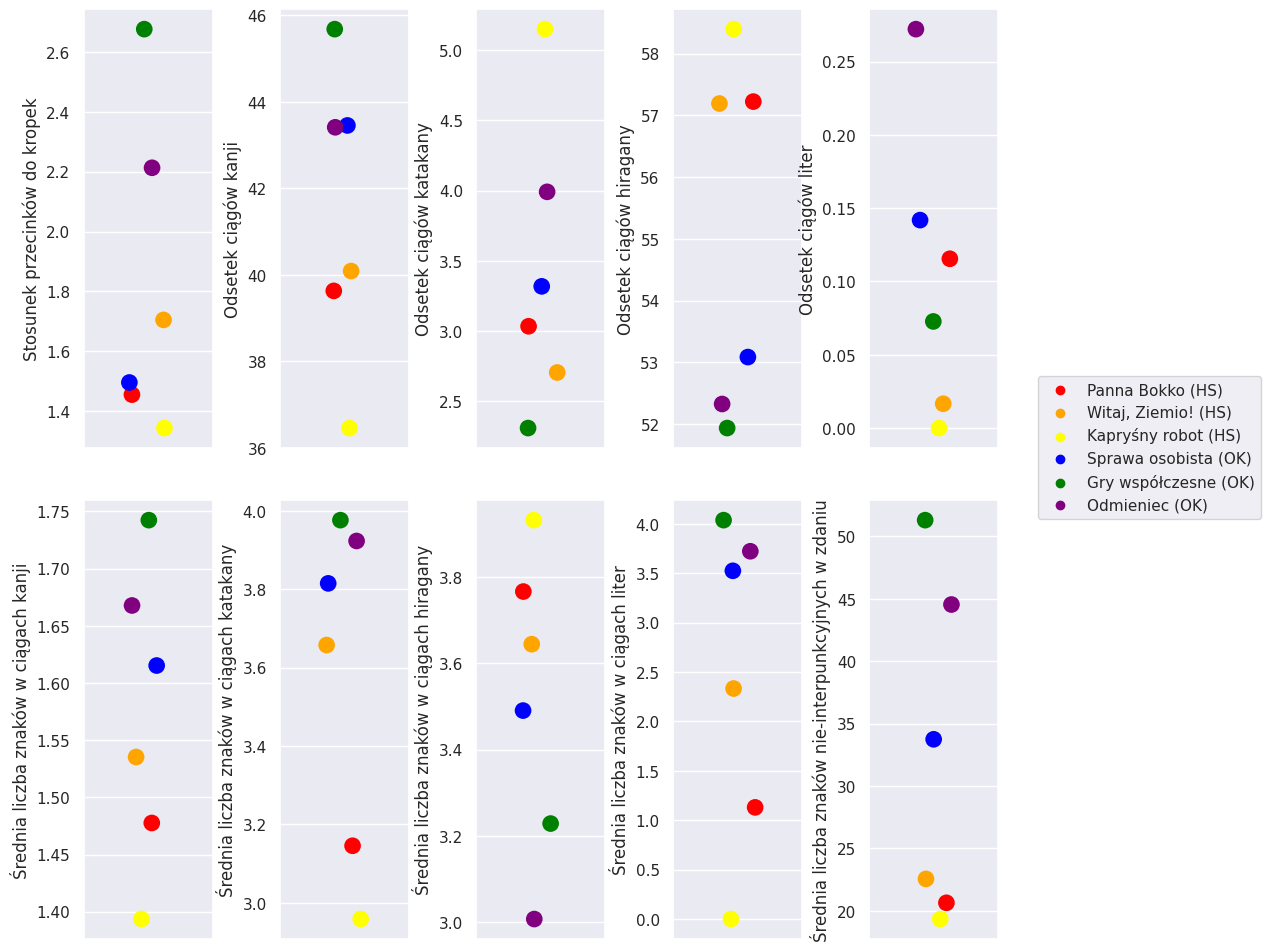

In [87]:
fig, axes = plt.subplots(2,5, figsize=(10,10))
fig.tight_layout()

df = dfs_for_plots['tatform']['factors']
y = dfs_for_plots['tatform']['factors'].columns.values[1:11]

legend=False
for i in range(len(y)):
    if i == len(y) - 1:
        legend=True
    seaborn_legend = seaborn.stripplot(
        data=df,
        y=y[i],
        legend=legend,
        palette=palette,
        hue='title',
        size=12,
        jitter=0.15,
        ax=axes[i//5, i%5]
    )

seaborn_legend.legend(bbox_to_anchor = (3.1,1.3))

# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(handles[0:1], labels[0:1], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


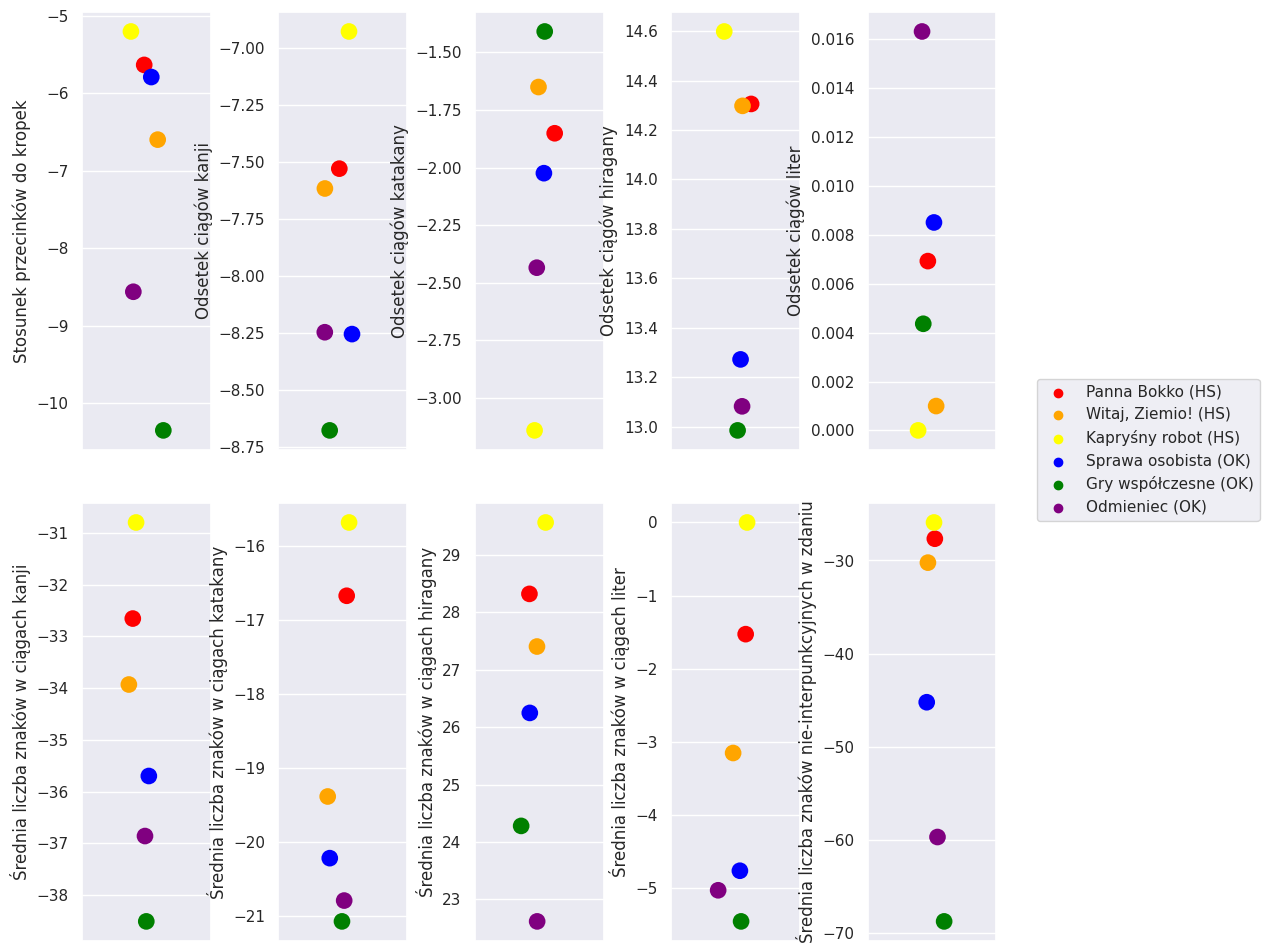

In [88]:
fig, axes = plt.subplots(2,5, figsize=(10,10))
fig.tight_layout()

df = dfs_for_plots['tatform']['weighted factors']
y = dfs_for_plots['tatform']['weighted factors'].columns.values[1:11]

legend=False
for i in range(len(y)):
    if i == len(y) - 1:
        legend=True
    seaborn_legend = seaborn.stripplot(
        data=df,
        y=y[i],
        legend=legend,
        palette=palette,
        hue='title',
        size=12,
        jitter=0.15,
        ax=axes[i//5, i%5]
    )

seaborn_legend.legend(bbox_to_anchor = (3.1,1.3))


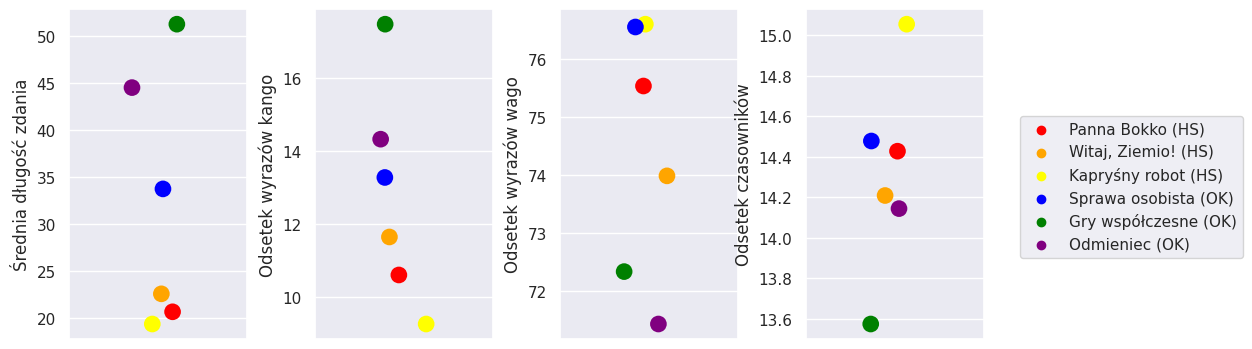

In [89]:
fig, axes = plt.subplots(1,4, figsize=(10,4))
fig.tight_layout()

df = dfs_for_plots['leeform']['factors']
y = dfs_for_plots['leeform']['factors'].columns.values[:4]

legend=False
for i in range(len(y)):
    if i == len(y) - 1:
        legend=True
    seaborn_legend = seaborn.stripplot(
        data=df,
        y=y[i],
        legend=legend,
        palette=palette,
        hue='title',
        size=12,
        jitter=0.15,
        ax=axes[i%4]
    )

seaborn_legend.legend(bbox_to_anchor = (2.5,0.7))

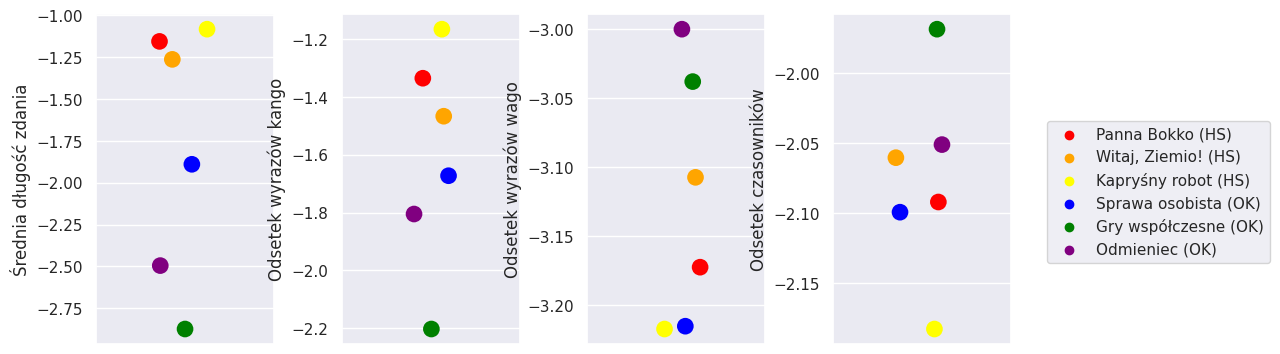

In [90]:
fig, axes = plt.subplots(1,4, figsize=(10,4))
fig.tight_layout()

df = dfs_for_plots['leeform']['weighted factors']
y = dfs_for_plots['leeform']['weighted factors'].columns.values[:4]

legend=False
for i in range(len(y)):
    if i == len(y) - 1:
        legend=True
    seaborn_legend = seaborn.stripplot(
        data=df,
        y=y[i],
        legend=legend,
        palette=palette,
        hue='title',
        size=12,
        jitter=0.15,
        ax=axes[i%4]
    )

seaborn_legend.legend(bbox_to_anchor = (2.5,0.7))

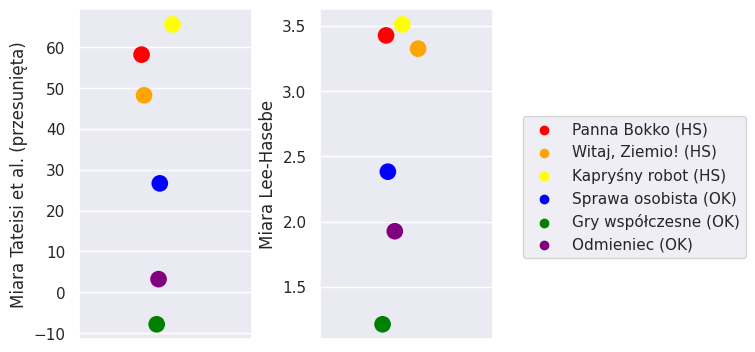

In [91]:
fig, axes = plt.subplots(1,2, figsize=(5,4))
fig.tight_layout()

df = dfs_for_plots['tatform']['weighted factors']
y = dfs_for_plots['tatform']['weighted factors']['Miara Tateisi et al. (przesunięta)']

legend=False
seaborn_legend = seaborn.stripplot(
    legend=legend,
    data=df,
    y=y,
    palette=palette,
    hue='title',
    size=12,
    jitter=0.15,
    ax=axes[0]
)
    
df = dfs_for_plots['leeform']['weighted factors']
y = dfs_for_plots['leeform']['weighted factors']['Miara Lee-Hasebe']
legend = True

seaborn_legend = seaborn.stripplot(
    legend=legend,
    data=df,
    y=y,
    palette=palette,
    hue='title',
    size=12,
    jitter=0.15,
    ax=axes[1]
)

seaborn_legend.legend(bbox_to_anchor = (2.5,0.7))

In [115]:
def english_translator(s: str) -> str:
    if s in all_translations['English']:
        return all_translations['English'][s]
    else:
        return s

for metric in dfs_for_plots:
    for weighted in dfs_for_plots[metric]:
        df = dfs_for_plots[metric][weighted]
        df.rename(columns=english_translator, index=english_translator, inplace=True)
        df.replace(all_translations['English'], inplace=True)

In [116]:
palette = {
    'Miss Bokko (HS)': '#FF0000',
    'Welcome, Earth! (HS)': '#FFA500',
    'Capricious Robot (HS)': '#FFFF00',
    'Silent Cry (OK)': '#0000FF',
    'Contemporary Games (OK)': '#008000',
    'The Changeling (OK)': '#800080' 
}

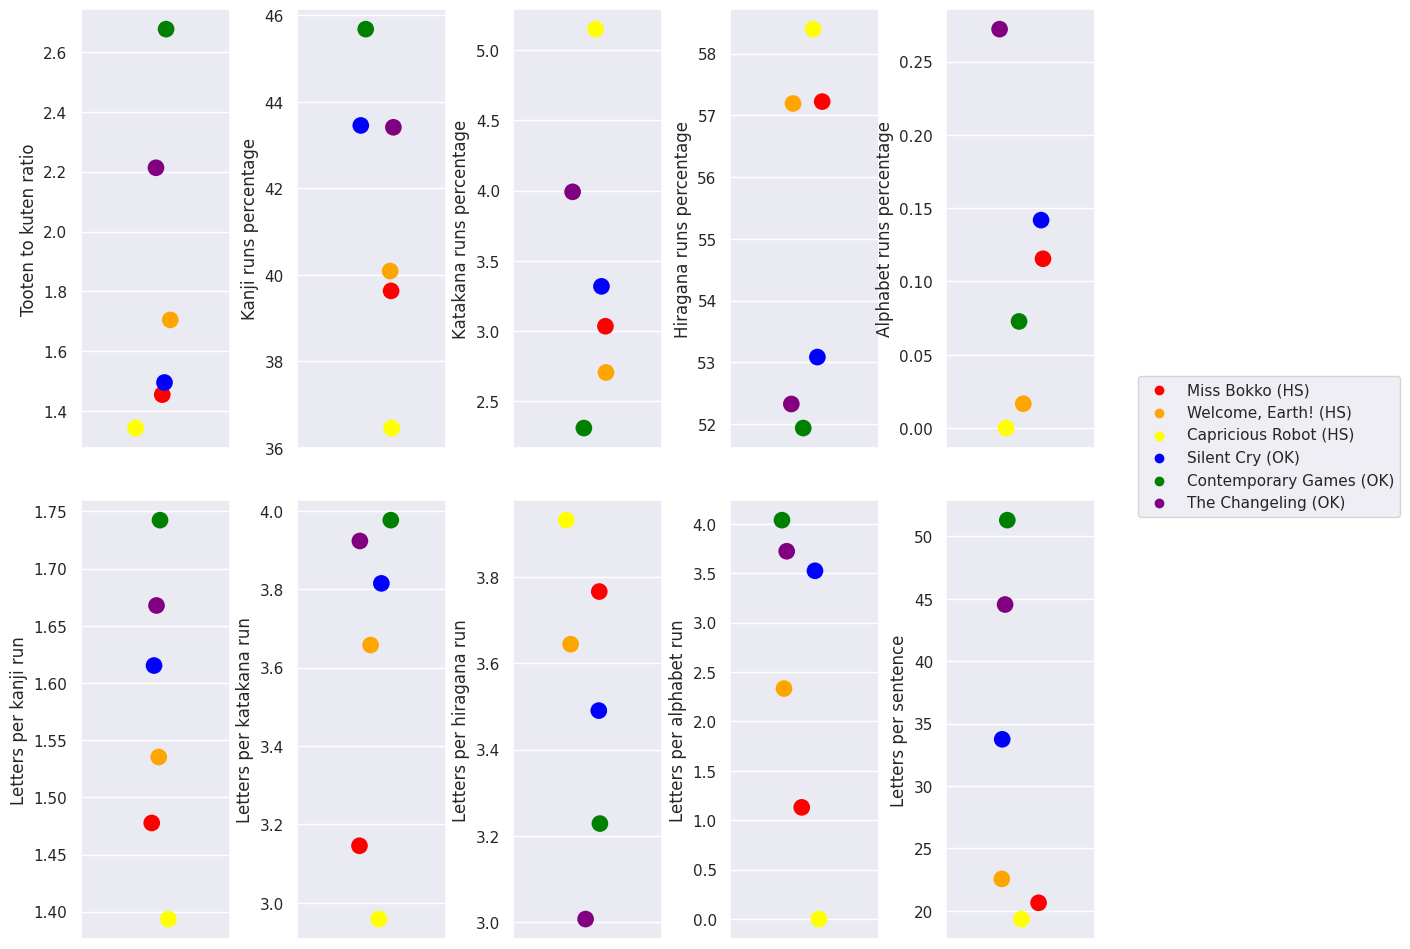

In [138]:
fig, axes = plt.subplots(2,5, figsize=(11,10))
fig.tight_layout()

df = dfs_for_plots['tatform']['factors']
y = dfs_for_plots['tatform']['factors'].columns.values[1:11]

legend=False
for i in range(len(y)):
    if i == len(y) - 1:
        legend=True
    seaborn_legend = seaborn.stripplot(
        data=df,
        y=y[i],
        legend=legend,
        palette=palette,
        hue='title',
        size=12,
        jitter=0.15,
        ax=axes[i//5, i%5]
    )

seaborn_legend.legend(bbox_to_anchor = (3.1,1.3))

# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(handles[0:1], labels[0:1], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


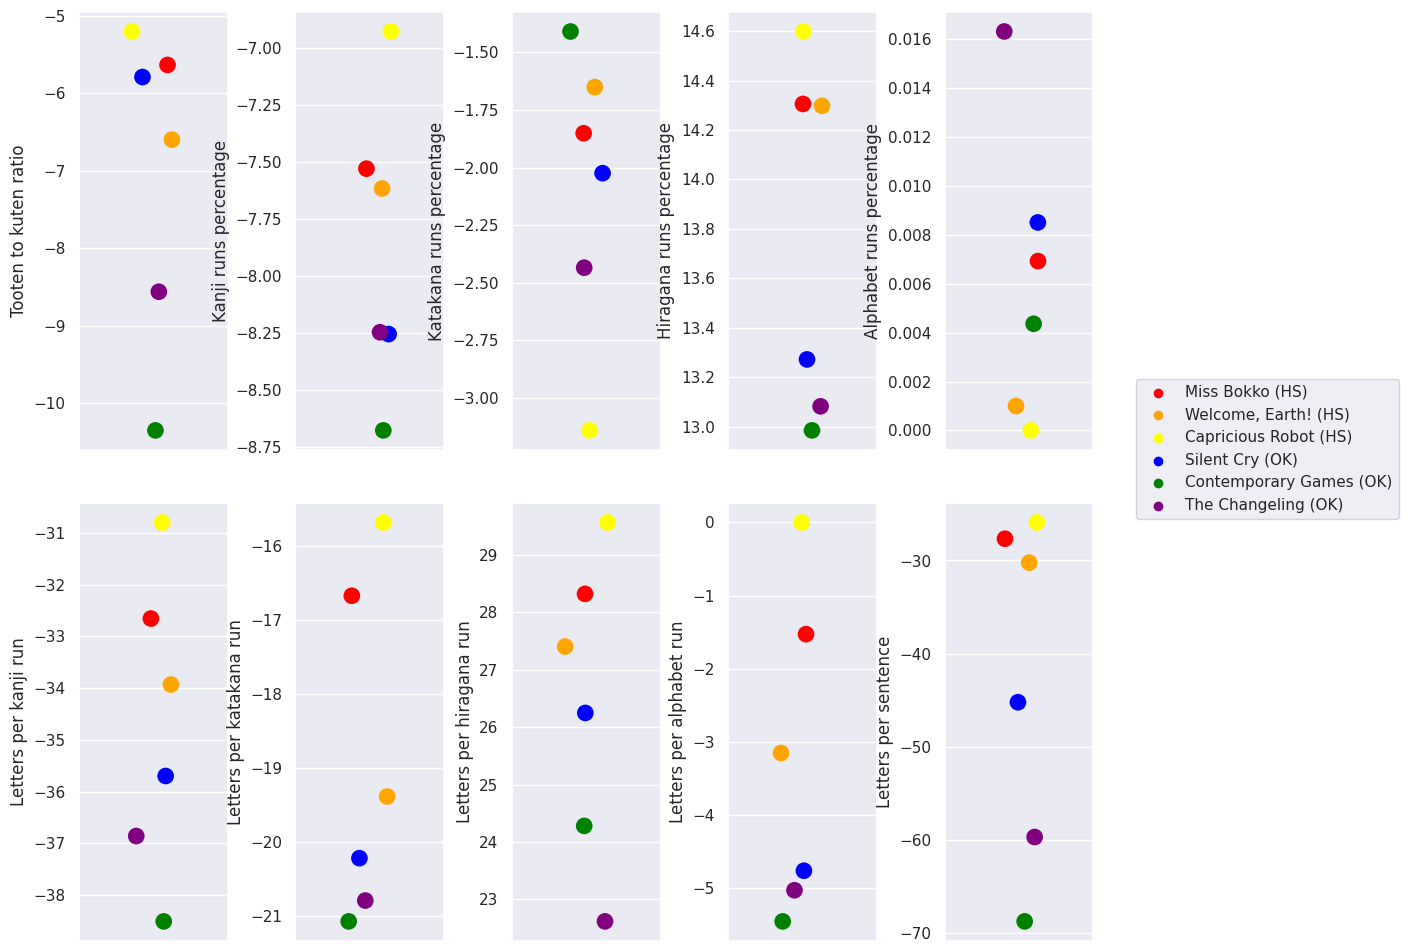

In [137]:
fig, axes = plt.subplots(2,5, figsize=(11,10))
fig.tight_layout()

df = dfs_for_plots['tatform']['weighted factors']
y = dfs_for_plots['tatform']['weighted factors'].columns.values[1:11]

legend=False
for i in range(len(y)):
    if i == len(y) - 1:
        legend=True
    seaborn_legend = seaborn.stripplot(
        data=df,
        y=y[i],
        legend=legend,
        palette=palette,
        hue='title',
        size=12,
        jitter=0.15,
        ax=axes[i//5, i%5]
    )

seaborn_legend.legend(bbox_to_anchor = (3.1,1.3))


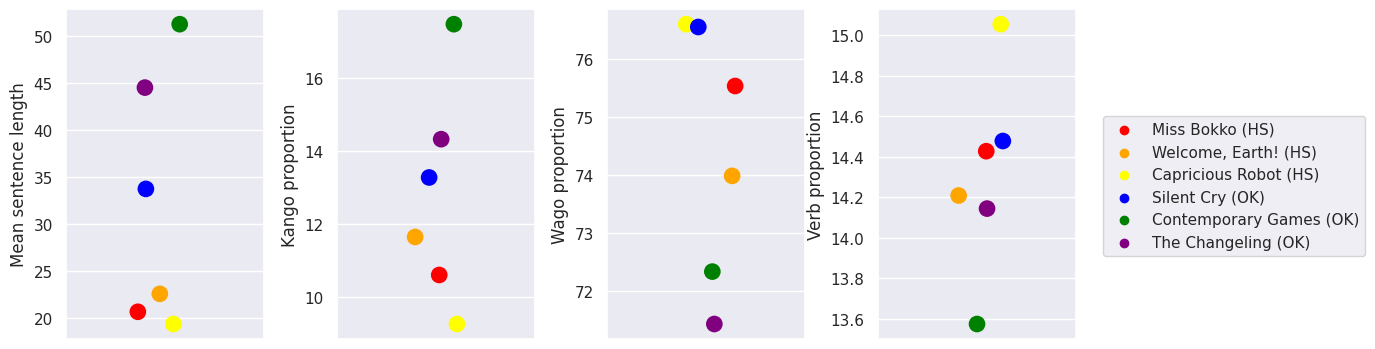

In [136]:
fig, axes = plt.subplots(1,4, figsize=(11,4))
fig.tight_layout()

df = dfs_for_plots['leeform']['factors']
y = dfs_for_plots['leeform']['factors'].columns.values[:4]

legend=False
for i in range(len(y)):
    if i == len(y) - 1:
        legend=True
    seaborn_legend = seaborn.stripplot(
        data=df,
        y=y[i],
        legend=legend,
        palette=palette,
        hue='title',
        size=12,
        jitter=0.15,
        ax=axes[i%4]
    )

seaborn_legend.legend(bbox_to_anchor = (2.5,0.7))

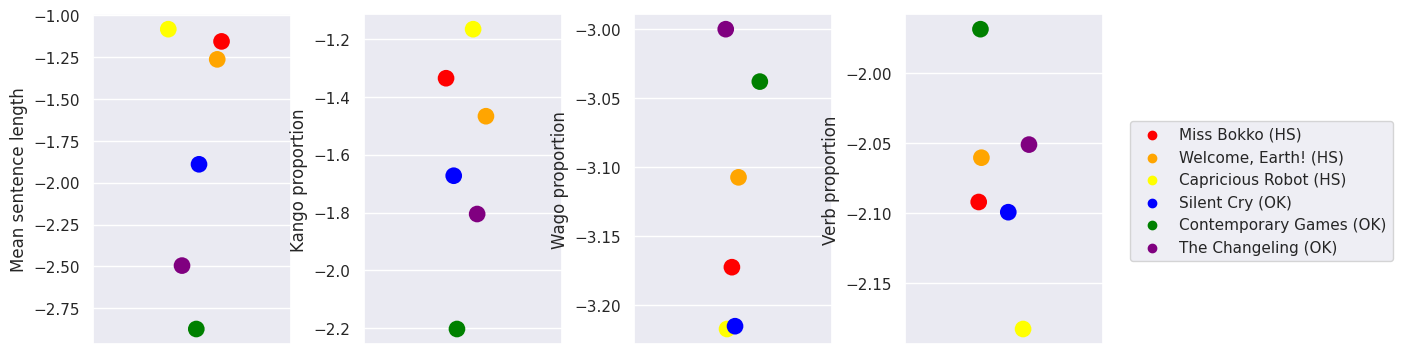

In [135]:
fig, axes = plt.subplots(1,4, figsize=(11,4))
fig.tight_layout()

df = dfs_for_plots['leeform']['weighted factors']
y = dfs_for_plots['leeform']['weighted factors'].columns.values[:4]

legend=False
for i in range(len(y)):
    if i == len(y) - 1:
        legend=True
    seaborn_legend = seaborn.stripplot(
        data=df,
        y=y[i],
        legend=legend,
        palette=palette,
        hue='title',
        size=12,
        jitter=0.15,
        ax=axes[i%4]
    )

seaborn_legend.legend(bbox_to_anchor = (2.5,0.7))

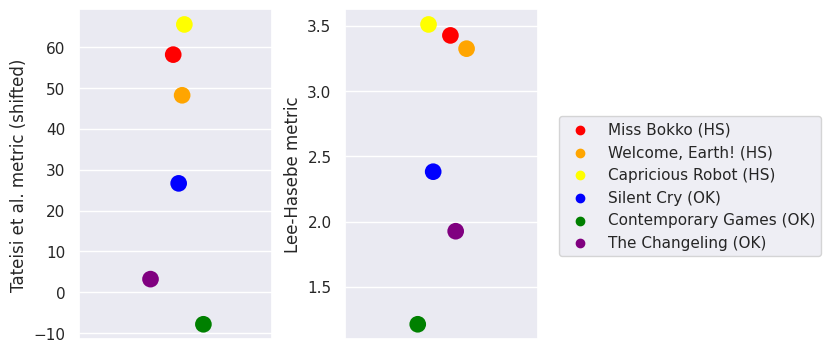

In [123]:
fig, axes = plt.subplots(1,2, figsize=(5.5,4))
fig.tight_layout()

df = dfs_for_plots['tatform']['weighted factors']
y = dfs_for_plots['tatform']['weighted factors']['Tateisi et al. metric (shifted)']

legend=False
seaborn_legend = seaborn.stripplot(
    legend=legend,
    data=df,
    y=y,
    palette=palette,
    hue='title',
    size=12,
    jitter=0.15,
    ax=axes[0]
)
    
df = dfs_for_plots['leeform']['weighted factors']
y = dfs_for_plots['leeform']['weighted factors']['Lee-Hasebe metric']
legend = True

seaborn_legend = seaborn.stripplot(
    legend=legend,
    data=df,
    y=y,
    palette=palette,
    hue='title',
    size=12,
    jitter=0.15,
    ax=axes[1]
)

seaborn_legend.legend(bbox_to_anchor = (2.5,0.7))